In [57]:
import numpy as np
import matplotlib.pyplot as plt

## Probem 3.7.5 - A Biochemical switch.

We introduce g(t) as the concentration of the gene product and $s_0$ as the fixed concentration of the biochemical signal substance.<br>
The model describing the evolution is given by
$$\dot g = k_1s_0 - k_2 g + \frac{k_3g^2}{k_4^2 + g^2}$$

a.) We want to transform this system to dimensionless form. We start by dividing both sides by $k_3$, and rewriting the denominator in the non linear term.
$$\frac{1}{k_3}\frac{dg}{d t} = \frac{k_1}{k_3}s_0 - \frac{k_2}{k_3}g + \frac{\frac{g^2}{k_4^2}}{1 + \frac{g^2}{k_4^2}}$$
We define: $x = \frac{g}{k_4}$, $s=\frac{k_1}{k_2}s_0$, $r = \frac{k_2 k_4}{k_3}$ and $\tau = \frac{k_3}{k_4}t$. Replacing in the equation, we get 
$$\frac{dx}{d\tau} = s - rx + \frac{x^2}{1+x^2}$$

b.) For s = 0, we want to find the fixed points of the above dimensionless equation.

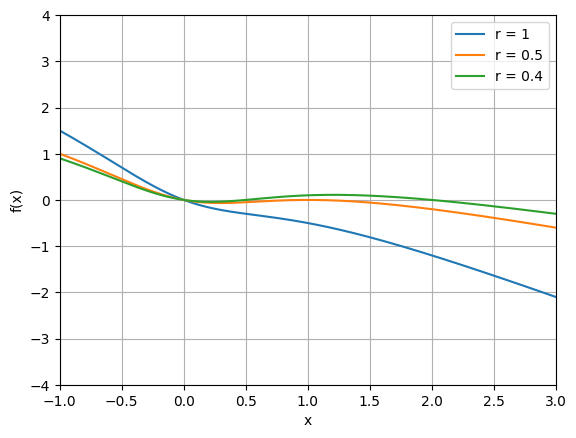

In [62]:
def Gene(x, r, s):
    return s - r*x + x**2/(1+x**2)

x = np.arange(-10, 10, 0.01)
r_vals = [1, 0.5, 0.4]

for r in r_vals:
    plt.plot(x, Gene(x, r, 0), label = f"r = {r}")
plt.grid()
plt.legend()
plt.ylim(-4, 4)
plt.xlim(-1,3)
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

Following the graphical approach of trying out different values, I found that the critical value of r is 0.5, and for any value less than 0.5, we get 2 distinct positive roots.<br>
We can use another approach by setting the derivative to 0 and rearrange the terms to get a polynomial form, then study the sign of the discriminant of this quadratic equation
$$rx^2 - x + r = 0$$
$$\Delta = 1 - 4r^2$$
We notice that for r = $\frac{1}{2}$, the descriminat is = 0 indicating the existence of a double root, and for any value less that $\frac{1}{2}$, there exists 2 distinct positive roots.

c.) We will study now the stability of a system if initiall we had g(0) = 0 and will suppose s increased from zero (meaning the activatibg signal has turned on). <br>
Noting that g = 0 corresponds to x = 0.

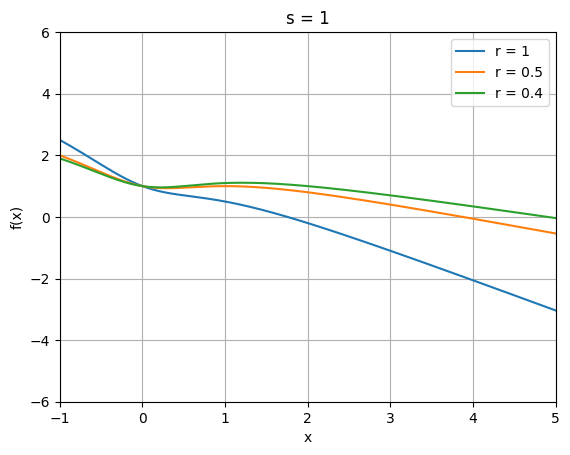

In [64]:
for r in r_vals:
    plt.plot(x, Gene(x, r, 1), label = f"r = {r}")
plt.grid()
plt.legend()
plt.ylim(-6, 6)
plt.xlim(-1,5)
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title("s = 1")
plt.show()

We see that for s = 1 (s is relatively big), we can only get 1 stable fixed point to which the system would evolve.

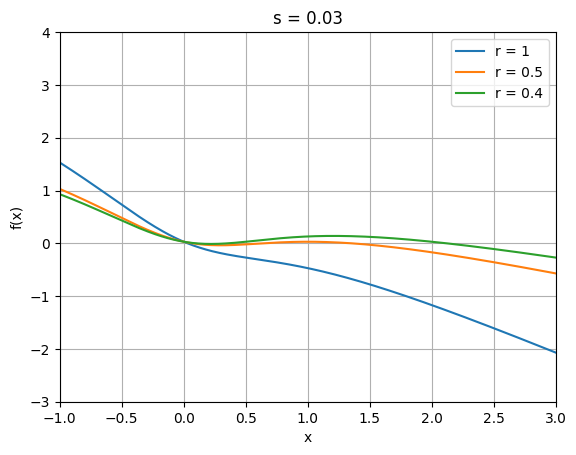

In [65]:
for r in r_vals:
    plt.plot(x, Gene(x, r, 0.03), label = f"r = {r}")
plt.grid()
plt.legend()
plt.ylim(-3, 4)
plt.xlim(-1,3)
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title("s = 0.03")
plt.show()

For r $\le$ 0.5, we have 3 positive fixed points. The far left is stable, the middle is unstable, and the far right is stable. The system could evolve to reach the far left stable point since it is the closest to its initial position. But if s was changing fast, it could reach the unstable point and get scattered to the far right stable point.<br>
For r > 0.5, we have only 1 stable fixed point to which the system would evolve. 

If s goes back to 0, for any value of r, there is always a stable fixed point at x = 0, hence starting from x = 0, the systen could not leave this point (assuming no noise is involved) and the gene would be turned off again.

d and e.) Saddle-node bifurcations occur when the expression of the derivative is equal to zero and the derivative of that expression is also equal to zero. we set these 2 expressions to zero and solve for a parametric equation relating r and s.

Working with the rearaanged polynomial form of the expression, we get the system
$$r(x^3 + x) - s(1+x^2) - x^2 =0$$
$$r(3x^2 + 1) - 2xs - 2x = 0$$
The second equation gives us
$$r = \frac{x^2 + s(1+x^2)}{x^3 + x}$$
Plugging in this value of r in the second equation, we get $$s = \frac{x^2 - x^4}{x^4 + 2x^2 +1} = \frac{x^2(1-x^2)}{(x^2 + 1)^2}$$
We could now replace the value of s in the expression of r, getting
$$r = \frac{2x}{(1+x^2)^2}$$

We now plot these 2 expressions against each other in the positive (r,s) quadant since both are positive parameters.

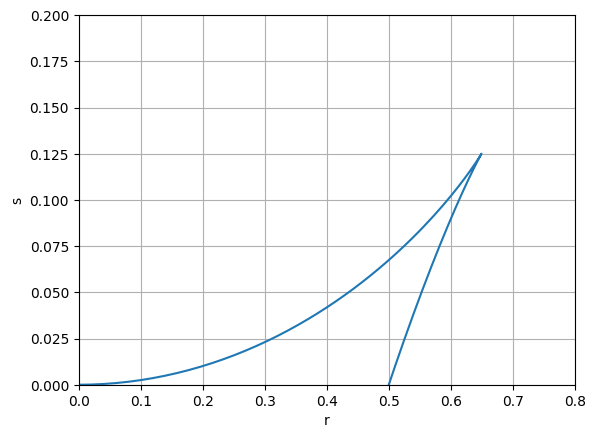

In [72]:
def s(x):
    return (x**2*(1-x**2))/(x**2 + 1)**2

def r(x):
    return (2*x)/(x**2 + 1)**2

plt.plot(r(x), s(x))
plt.grid()
plt.xlim(0, 0.8)
plt.ylim(0, 0.2)
plt.xlabel("r")
plt.ylabel("s")
plt.show()